<a href="https://colab.research.google.com/github/EroshBc/DataSceince/blob/main/Facial_recognition_for_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Designed a Convolutional Neural Network (CNN) to recognize individuals in video footage, with the ability to identify the same person across different videos. This project involved utilizing advanced deep-learning techniques for feature extraction and classification.

1. Create a data set from different videos using Python to extract frames.
2. Create subsets for training, validation, and testing.
3. Setup hyperparameters (number of epochs, batch size, input shape).
4. Setup training and validation data generators (used TensorFlow Keras)
5. Setup CNN model and trained
Training and validation accuracy  is  99% using matplot to visualize
6. Code with Generative AI. Evaluate the model on test data accuracy is 0.05% and accuracy is 98.6%
7. Use the trained model to predict the character that appears in a new video frame number range and the time in seconds.


In [ ]:
!jupyter nbconvert --to html Final_Project.ipynb

[NbConvertApp] Converting notebook Final_Project.ipynb to html
[NbConvertApp] Writing 872330 bytes to Final_Project.html


load the youtube video and create data sets


In [ ]:
import cv2
import os
import random
import shutil



In [ ]:
def frame_extract (video_path, output_directory,name):

    #Create output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    #initialize video capture object
    cap = cv2.VideoCapture(video_path)

    #initiate skip frame count and frame count
    skip_count = 0
    frame_count = 0

    while True:
      ret, frame = cap.read()
      if not ret :
        break

      #skip frames as needed
      skip_count += 1
      if skip_count <15:
        continue
      skip_count = 0


      #Save frame as an image
      frame_path = os.path.join(output_directory , f"{name}_{frame_count}.jpg")
      cv2.imwrite(frame_path,frame)

      frame_count += 1

      #if maximum count reach break
      if frame_count >= 1325:
       break

    #close video file
    cap.release()





In [ ]:
video_path = "/content/ENGLISH SPEECH   BARACK OBAMA The People of India (English Subtitles).mp4"
output_directory = 'data/Obama'
name = "Obama"
frame_extract(video_path, output_directory, name)

In [ ]:
video_path = "/content/Exclusive One-on-one with President Biden on 2024 re-election bid, debt limit and more.mp4"
output_directory = 'data/Biden'
name = "Biden"
frame_extract(video_path, output_directory, name)

In [ ]:
video_path = "/content/President Barack Obama delivers stirring speech in Parliament.mp4"
output_directory = 'data/Interview'
name = "Parliament"
frame_extract(video_path, output_directory, name)

In [ ]:
video_path = "/content/Vice President Harris Talks Biden's Marijuana Pardon, 2022 Midterms and Abortion Rights.mp4"
output_directory = 'data/kamala'
name = "kamala"
frame_extract(video_path, output_directory, name)

NameError: ignored

In [ ]:
!zip -r /content/data /content/data/


	zip warning: name not matched: /content/data/

zip error: Nothing to do! (try: zip -r /content/data . -i /content/data/)


In [ ]:
!unzip dataset.zip



Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/.DS_Store       
  inflating: __MACOSX/dataset/._.DS_Store  
   creating: dataset/character/
   creating: dataset/non-character/
  inflating: dataset/character/Parliament_687.jpg  
  inflating: __MACOSX/dataset/character/._Parliament_687.jpg  
  inflating: dataset/character/Parliament_863.jpg  
  inflating: __MACOSX/dataset/character/._Parliament_863.jpg  
  inflating: dataset/character/Parliament_877.jpg  
  inflating: __MACOSX/dataset/character/._Parliament_877.jpg  
  inflating: dataset/character/Parliament_122.jpg  
  inflating: __MACOSX/dataset/character/._Parliament_122.jpg  
  inflating: dataset/character/Parliament_644.jpg  
  inflating: __MACOSX/dataset/character/._Parliament_644.jpg  
  inflating: dataset/character/Parliament_1312.jpg  
  inflating: __MACOSX/dataset/character/._Parliament_1312.jpg  
  inflating: dataset/character/Parliament_1306.jpg  
  inflating: __MACOSX/dataset/character/._Parliament_1306.jpg

In [ ]:
import os
import random
import shutil

In [ ]:
# Set the paths to the original data and the destination folders for the subsets
original_data_dir = '/content/dataset'
train_dir = '/content/dataset/train'
validation_dir = '/content/dataset/validation'
test_dir = '/content/dataset/test'

# Set the percentage of data to use for each subset
train_percentage = 0.7
validation_percentage = 0.15
test_percentage = 0.15

In [ ]:
# Get the list of classes (subdirectories) in the original data directory
classes = [class_name for class_name in os.listdir(original_data_dir) if os.path.isdir(os.path.join(original_data_dir, class_name))]


In [ ]:
# Create the destination folders if they do not exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(validation_dir):
    os.makedirs(validation_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

In [ ]:
# Iterate over each class
for class_name in classes:
    class_path = os.path.join(original_data_dir, class_name)
    images = [f for f in os.listdir(class_path) if f.endswith('.jpg')]

    # Shuffle the list of images within each class
    random.shuffle(images)

    # Calculate the number of images for each subset
    train_size = int(len(images) * train_percentage)
    validation_size = int(len(images) * validation_percentage)
    test_size = int(len(images) * test_percentage)

    # Create the destination subdirectories for each class in each subset
    train_class_dir = os.path.join(train_dir, class_name)
    validation_class_dir = os.path.join(validation_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(validation_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Copy the image files to the destination folders for each subset and class
    for i, image_file in enumerate(images):
        src_path = os.path.join(class_path, image_file)

        if i < train_size:
            dst_dir = train_class_dir
        elif i < train_size + validation_size:
            dst_dir = validation_class_dir
        else:
            dst_dir = test_class_dir

        dst_path = os.path.join(dst_dir, image_file)
        shutil.copy(src_path, dst_path)


In [ ]:
#setup hyperparameters
num_epochs = 10
batch_size = 32
input_shape = (224,224,3)

In [ ]:
#set up training and validation data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size = batch_size,
    class_mode = 'binary'
)

vali_datagen = ImageDataGenerator(rescale = 1./255)
vali_generator = vali_datagen.flow_from_directory(
    validation_dir,
    target_size=input_shape[:2],
    batch_size = batch_size,
    class_mode = 'binary'
)


Found 1050 images belonging to 2 classes.
Found 224 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

#define data augmentation pipeline

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("vertical"),
    layers.RandomCrop(256,256),
    layers.RandomContrast(0.2),
    layers.RandomRotation(0.1),
    layers.RandomTranslation(0.1,0.1),
    layers.RandomZoom(0.2),
  ]
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

#setup CNN archtecture
model = Sequential([
    data_augmentation,
    Conv2D(32, (3,3), activation ='relu', input_shape = input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation ='relu', input_shape = input_shape),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation ='relu', input_shape = input_shape),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(1,activation='sigmoid')

])


In [ ]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'],run_eagerly=True)

In [ ]:
#define callbacks#define callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [ ]:
#train the model
history = model.fit(train_generator, epochs= num_epochs, validation_data=vali_generator, callbacks=[early_stop, checkpoint])

Epoch 1/10


33/33 [==============================] - 13s 263ms/step - loss: 0.3950 - accuracy: 0.8390 - val_loss: 0.0287 - val_accuracy: 0.9911
Epoch 2/10
33/33 [==============================] - 8s 230ms/step - loss: 0.0278 - accuracy: 0.9943 - val_loss: 0.0078 - val_accuracy: 0.9955
Epoch 3/10
33/33 [==============================] - 7s 206ms/step - loss: 0.0153 - accuracy: 0.9971 - val_loss: 0.0128 - val_accuracy: 0.9955
Epoch 4/10
33/33 [==============================] - 7s 212ms/step - loss: 0.0174 - accuracy: 0.9962 - val_loss: 0.0146 - val_accuracy: 0.9955
Epoch 5/10
33/33 [==============================] - 7s 214ms/step - loss: 0.0193 - accuracy: 0.9971 - val_loss: 0.0094 - val_accuracy: 0.9955
Epoch 5: early stopping


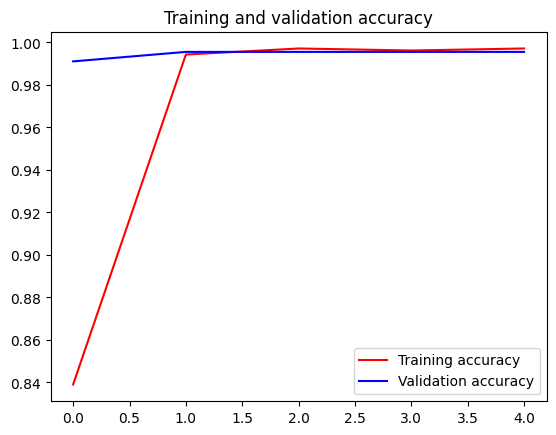

<Figure size 640x480 with 0 Axes>

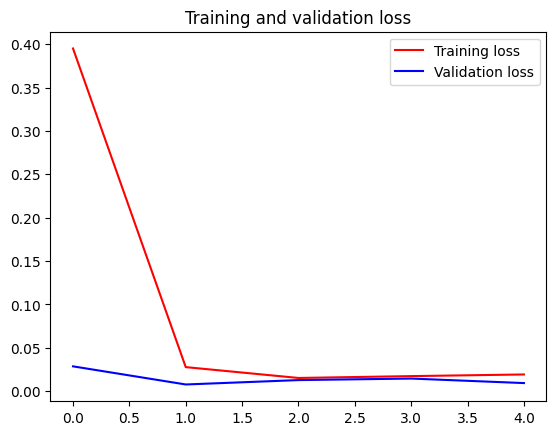

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot learning curves


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
#Evaluate the model on test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size = batch_size,
    class_mode = 'binary'
)

model.evaluate(test_generator)

Found 227 images belonging to 2 classes.
8/8 [==============================] - 1s 147ms/step - loss: 0.0562 - accuracy: 0.9868


[0.05621030926704407, 0.9867841601371765]

In [ ]:
from IPython.core.inputtransformer2 import find_last_indent
import cv2
import numpy as np
#Use the trained model to predict the character in a new video

new_video = cv2.VideoCapture('/content/evaluate.mp4')
frame_duration = 1.0/30.0

frames = []

while True:
  ret, frame = new_video.read()
  if not ret:
    break

  frames.append(cv2.resize(frame, input_shape[:2]))
frames = np.array(frames) /255.0

predictions = model.predict(frames)

character_start = None
character_end = None

start_time = []
end_time = []
in_chracter = False

for i in range(len(predictions)):
  if predictions[i] > 0.5:

    if character_start is None:
      character_start = i
      start_time.append(i * frame_duration)

    character_end = i
  else:
    if character_start is not None:
      print(f'character appears from frame {character_start} to {character_end}.')
      end_time.append(i*frame_duration)

      character_start = None
      character_end = None

if character_start is not None:
  end_time.append(len(predictions) * frame_duration)
  print(f'character appears from frame {character_start} to {character_end}.')


#print start time and end time of each characer appearence
for i in range(len(start_time)):
  print(f'Character appears from{start_time[i]:.2f}s to {end_time[i]:.2f}s')


212/212 [==============================] - 5s 24ms/step
character appears from frame 269 to 277.
character appears from frame 1531 to 1628.
character appears from frame 1903 to 1911.
character appears from frame 2183 to 2191.
character appears from frame 2718 to 2726.
character appears from frame 2925 to 3001.
character appears from frame 3166 to 3174.
character appears from frame 3470 to 3646.
character appears from frame 3737 to 3907.
character appears from frame 3982 to 4298.
character appears from frame 4336 to 4481.
character appears from frame 5092 to 5100.
character appears from frame 5499 to 5507.
character appears from frame 6446 to 6454.
character appears from frame 6709 to 6716.
Character appears from8.97s to 9.27s
Character appears from51.03s to 54.30s
Character appears from63.43s to 63.73s
Character appears from72.77s to 73.07s
Character appears from90.60s to 90.90s
Character appears from97.50s to 100.07s
Character appears from105.53s to 105.83s
Character appears from115.6